Import Libraries and Initial Data Processing

In [10]:
import pandas as pd
from datetime import datetime, timedelta

# Convert 1-minute Bitcoin data to daily data
def convert_to_daily(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    df = df.set_index('Timestamp')
    daily_df = df.resample('D').agg({
        'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'sum'
    })
    return daily_df

try:
    # Read the 1-minute data
    bitcoin_df = pd.read_csv('btcusd_1-min_data.csv')
    # Convert to daily data
    daily_data = convert_to_daily(bitcoin_df)
    print(daily_data.head())
    # Save daily data to a new CSV
    daily_data.to_csv('July_daily.csv')
    print("Daily data saved to July_daily.csv")
except FileNotFoundError:
    print("btcusd_1-min_data.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")

                Open      High       Low     Close      Volume
Timestamp                                                     
2012-01-01  4.645697  4.645697  4.645697  4.645697   10.000000
2012-01-02  4.975000  4.975000  4.975000  4.975000   10.100000
2012-01-03  5.085500  5.085500  5.085500  5.085500  107.085281
2012-01-04  5.170250  5.170396  5.170250  5.170396  107.233260
2012-01-05  5.954292  5.954361  5.954292  5.954361   70.328742
Daily data saved to July_daily.csv


Load Daily Data and Define DCA Calculation Function

In [13]:
# Load the preprocessed daily data
df = pd.read_csv('July_daily.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

def calculate_dca(df, investment_amount, frequency_days, start_date, end_date):
    purchases = []
    current_date = start_date
    total_invested = 0
    total_btc = 0

    while current_date <= end_date:
        price_row = df[df['Timestamp'] <= current_date].iloc[-1]
        btc_bought = investment_amount / price_row['Close']
        total_invested += investment_amount
        total_btc += btc_bought
        
        purchases.append({
            'Date': current_date,
            'BTC_Bought': btc_bought,
            'Price': price_row['Close'],
            'Total_Invested': total_invested,
            'Total_BTC': total_btc
        })
        
        current_date += timedelta(days=frequency_days)

    final_price = df[df['Timestamp'] == end_date]['Close'].values[0]
    final_value = total_btc * final_price

    return pd.DataFrame(purchases), total_invested, total_btc, final_value

DCA Simulation and Results

In [ ]:
# Parameters for DCA strategy
investment_amount = 100 # Dollar Amount
frequency_days = 7 # Purchase every 7 Days
start_date = datetime(2025, 6, 1) # Start June 1st
end_date = datetime(2025, 7, 18) # Last date with data

# Run DCA simulation
purchases_df, total_invested, total_btc, final_value = calculate_dca(df, investment_amount, frequency_days, start_date, end_date)

# Calculate the total value of Bitcoin held
purchases_df['Total_Value'] = purchases_df['Total_BTC'] * purchases_df['Price']

# Output results
print(f"Total invested: ${total_invested:.2f}")
print(f"Total BTC bought: {total_btc:.8f}")
print(f"Final BTC value at {end_date.date()}: ${final_value:.2f}")
print(f"Return on Investment: {(final_value - total_invested) / total_invested * 100:.2f}%")

# Display purchases data
print(purchases_df)

# Export DCA results to CSV
purchases_df.to_csv('dca_results.csv', index=False)
print("DCA results saved to dca_results.csv")

Total invested: $700.00
Total BTC bought: 0.00653260
Final BTC value at 2025-07-18: $780.71
Return on Investment: 11.53%
        Date  BTC_Bought          Price  Total_Invested  Total_BTC  \
0 2025-06-01    0.000956  104646.463194             100   0.000956   
1 2025-06-08    0.000945  105795.920833             200   0.001901   
2 2025-06-15    0.000949  105393.451389             300   0.002850   
3 2025-06-22    0.000987  101326.425694             400   0.003837   
4 2025-06-29    0.000929  107690.979861             500   0.004765   
5 2025-07-06    0.000922  108456.222222             600   0.005687   
6 2025-07-13    0.000845  118282.252083             700   0.006533   

   Total_Value  
0   100.000000  
1   201.098420  
2   300.333400  
3   388.743841  
4   513.161768  
5   616.808249  
6   772.690485  
DCA results saved to dca_results.csv


Dollar Cost Averaging: $100 Dollars every week over 1 Year

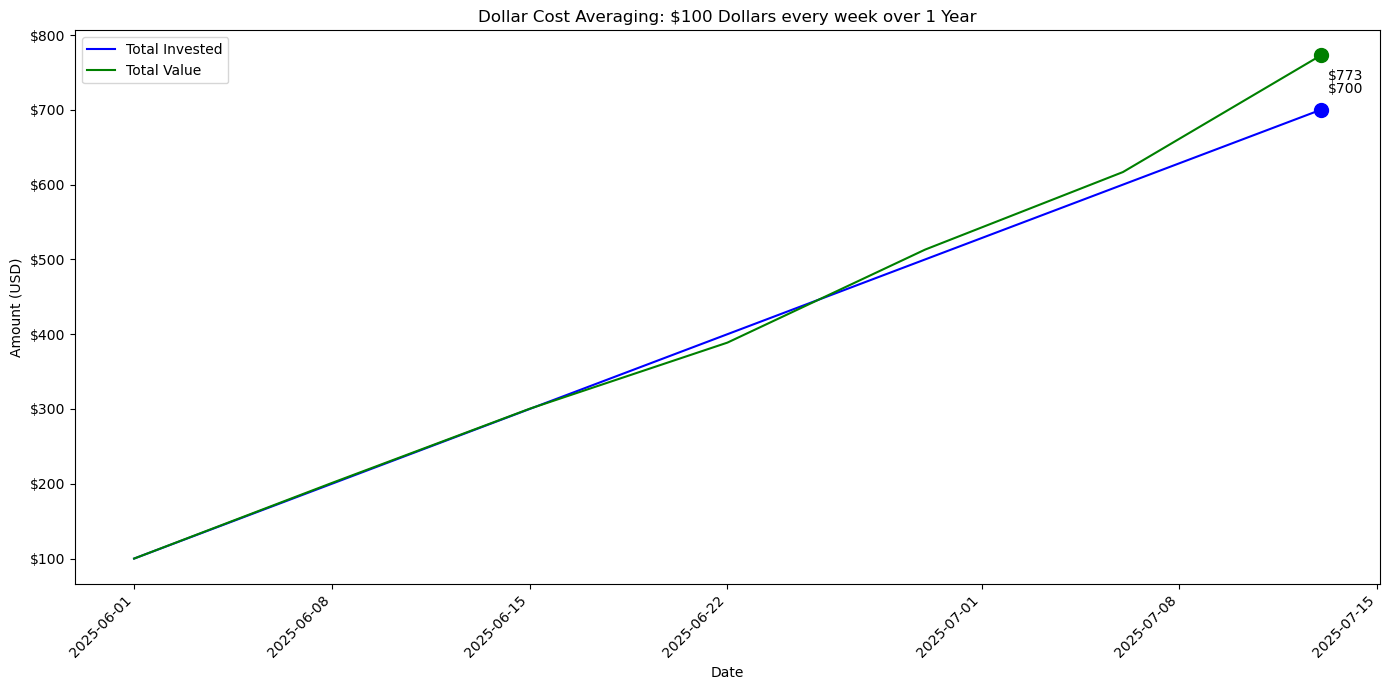

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('dca_results.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime if not already

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Total_Invested and Total_Value
plt.plot(df['Date'], df['Total_Invested'], label='Total Invested', color='blue')
plt.plot(df['Date'], df['Total_Value'], label='Total Value', color='green')

# Add labels and title
plt.title('Dollar Cost Averaging: $100 Dollars every week over 1 Year')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.legend()

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability if dates are close together
plt.xticks(rotation=45, ha='right')

# Add markers and annotations at the end points
last_date = df['Date'].iloc[-1]
last_invested = df['Total_Invested'].iloc[-1]
last_value = df['Total_Value'].iloc[-1]

# Add markers
plt.plot(last_date, last_invested, 'bo', markersize=10)  # Blue dot for Total Invested
plt.plot(last_date, last_value, 'go', markersize=10)    # Green dot for Total Value

# Annotation for Total Invested
plt.annotate(f'${last_invested:,.0f}', 
             xy=(last_date, last_invested), 
             xytext=(5, 10), textcoords='offset points',
             ha='left', va='bottom')

# Annotation for Total Value
plt.annotate(f'${last_value:,.0f}', 
             xy=(last_date, last_value), 
             xytext=(5, -10), textcoords='offset points',
             ha='left', va='top')

# Adjust the plot layout
plt.tight_layout()
plt.show()